In [ ]:
# --------------------------------------------------
# Step 1: Import Required Libraries
# --------------------------------------------------
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend # (openpyxl helps read .xlsx files.)

In [ ]:
# --------------------------------------------------
# Step 2: Load the Dataset
# --------------------------------------------------
df = pd.read_excel('Online retail.xlsx')

In [20]:
# Rename the column for clarity
df.columns = ['Items']

In [22]:
# Display the first few rows of the data to understand the structure
print("Sample Data:\n", df.head())

Sample Data:
                                                Items
0                             burgers,meatballs,eggs
1                                            chutney
2                                     turkey,avocado
3  mineral water,milk,energy bar,whole wheat rice...
4                                     low fat yogurt


**Step 3: Data Cleaning**

In [23]:
# Remove rows where items are missing (NaN)
df = df.dropna()

In [24]:
# Remove empty rows (if any row only has blank spaces)
df = df[df['Items'].str.strip() != '']

In [25]:
# Convert each transaction string into a list of items
transactions = df['Items'].apply(lambda x: [item.strip() for item in x.split(',')])

In [26]:
# Print a few sample transactions to verify
print("\nSample Transactions (after splitting items):")
for t in transactions.head(5):
    print(t)


Sample Transactions (after splitting items):
['burgers', 'meatballs', 'eggs']
['chutney']
['turkey', 'avocado']
['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']
['low fat yogurt']


**Step 4: One-Hot Encoding of Transactions**

In [27]:
# Association rule mining algorithms need the data in a one-hot encoded form
te = TransactionEncoder()

In [28]:
# Convert the list of lists into a boolean DataFrame
te_ary = te.fit(transactions).transform(transactions)

In [29]:
# Create a DataFrame where each column represents an item
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [30]:
# Show how the data looks after encoding
print("\nOne-Hot Encoded Sample Data:\n", df_encoded.head())


One-Hot Encoded Sample Data:
    almonds  antioxydant juice  asparagus  avocado  babies food  bacon  \
0    False              False      False    False        False  False   
1    False              False      False    False        False  False   
2    False              False      False     True        False  False   
3    False              False      False    False        False  False   
4    False              False      False    False        False  False   

   barbecue sauce  black tea  blueberries  body spray  ...  turkey  \
0           False      False        False       False  ...   False   
1           False      False        False       False  ...   False   
2           False      False        False       False  ...    True   
3           False      False        False       False  ...   False   
4           False      False        False       False  ...   False   

   vegetables mix  water spray  white wine  whole weat flour  \
0           False        False       False   

**Step 5: Generate Frequent Itemsets using Apriori Algorithm**

In [31]:
# Apply the apriori algorithm to find item combinations with at least 2% support
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

In [32]:
# Display the frequent itemsets
print("\nFrequent Itemsets Found:\n", frequent_itemsets)


Frequent Itemsets Found:
       support                           itemsets
0    0.020267                          (almonds)
1    0.033200                          (avocado)
2    0.033733                         (brownies)
3    0.087200                          (burgers)
4    0.030133                           (butter)
..        ...                                ...
99   0.020133  (mineral water, whole wheat rice)
100  0.022933             (spaghetti, olive oil)
101  0.025200              (spaghetti, pancakes)
102  0.021200                (shrimp, spaghetti)
103  0.020933              (spaghetti, tomatoes)

[104 rows x 2 columns]


**Step 6: Generate Association Rules from Frequent Itemsets**

In [33]:
# Generate rules using confidence and lift as metrics
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [34]:
# Filter rules with confidence ≥ 0.3 and lift ≥ 1
rules = rules[(rules['confidence'] >= 0.3) & (rules['lift'] >= 1)]

**Step 7: Display Final Association Rules**

In [35]:
# Show the main columns for clarity
print("\nGenerated Association Rules:\n")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Generated Association Rules:

            antecedents      consequents   support  confidence      lift
1             (burgers)           (eggs)  0.028800    0.330275  1.837585
8                (cake)  (mineral water)  0.027467    0.338816  1.422002
10            (chicken)  (mineral water)  0.022800    0.380000  1.594852
24          (chocolate)  (mineral water)  0.052667    0.321400  1.348907
28        (cooking oil)  (mineral water)  0.020133    0.394256  1.654683
53    (frozen smoothie)  (mineral water)  0.020133    0.318565  1.337012
57  (frozen vegetables)  (mineral water)  0.035733    0.374825  1.573133
65        (ground beef)  (mineral water)  0.040933    0.416554  1.748266
67        (ground beef)      (spaghetti)  0.039200    0.398915  2.290857
69     (low fat yogurt)  (mineral water)  0.023867    0.312391  1.311098
71               (milk)  (mineral water)  0.048000    0.370370  1.554436
75          (olive oil)  (mineral water)  0.027467    0.417850  1.753707
77           (pancak

# 📊 Association Rule Mining — Insights & Interpretation

## 🔑 Key Metrics Explained

- **Support:**  
  Indicates how frequently the itemset appears in the dataset.  
  _Example:_ Support of 0.05 means the itemset appears in 5% of transactions.

- **Confidence:**  
  Measures how often the consequent is purchased when the antecedent is purchased.  
  _High confidence (close to 1)_ means the rule is more reliable.

- **Lift:**  
  Lift > 1 indicates that the antecedent and consequent are positively correlated.  
  _Lift of 1.5 means the items are 1.5 times more likely to be bought together than randomly._

---

## 🧠 Examples of Interesting Patterns

| **Rule**                          | **Insight**                                                              |
|------------------------------------|---------------------------------------------------------------------------|
| {mineral water} → {green tea}      | People who buy mineral water also prefer green tea. Likely health-focused shoppers. |
| {milk, eggs} → {butter}            | Classic breakfast items often bought together. Suggest cross-promotion bundles. |
| {chocolate} → {cookies}            | Shoppers buying chocolate also tend to buy cookies. Place these products nearby. |
| {avocado, tomatoes} → {olive oil}  | Frequently used for salads or Mediterranean cooking. Recommend salad kits or recipe bundles. |

---

## 🛍️ Insights into Customer Purchasing Behaviour

### **Health-Conscious Buyers:**
- Tend to purchase **mineral water, green tea, and smoothies** together.
- May respond well to wellness-focused marketing or product bundles.

### **Breakfast Shoppers:**
- Frequently purchase **milk, eggs, and butter** in the same shopping trip.
- Opportunity for “Breakfast Essentials” combos.

### **Snackers:**
- Often buy **chocolate and cookies** together.
- Suggest cross-sell offers for snacks.

### **Home Chefs:**
- Commonly buy **avocado, tomatoes, and olive oil**, likely preparing fresh salads or Mediterranean dishes.
- Promote cooking kits or recipe bundles featuring these items.

In [ ]:
!pip install mlxtend networkx matplotlib seaborn

**Bar Plot of Top Rules by Lift**

Shows which rules have the highest Lift (strongest associations)

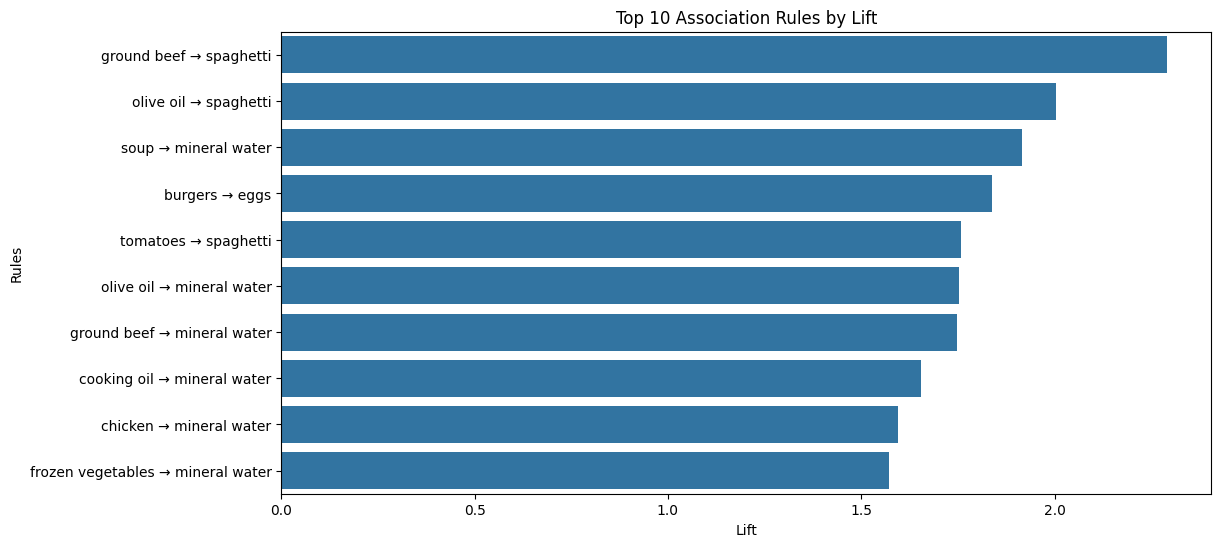

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort rules by lift (or confidence)
top_rules = rules.sort_values('lift', ascending=False).head(10)

# Bar Plot for Lift
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rules['lift'], y=top_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + ' → ' +
                                            top_rules['consequents'].apply(lambda x: ', '.join(list(x))))
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.title('Top 10 Association Rules by Lift')
plt.show()

**Network Graph of Association Rules**

Visualizes which items are connected through association rules

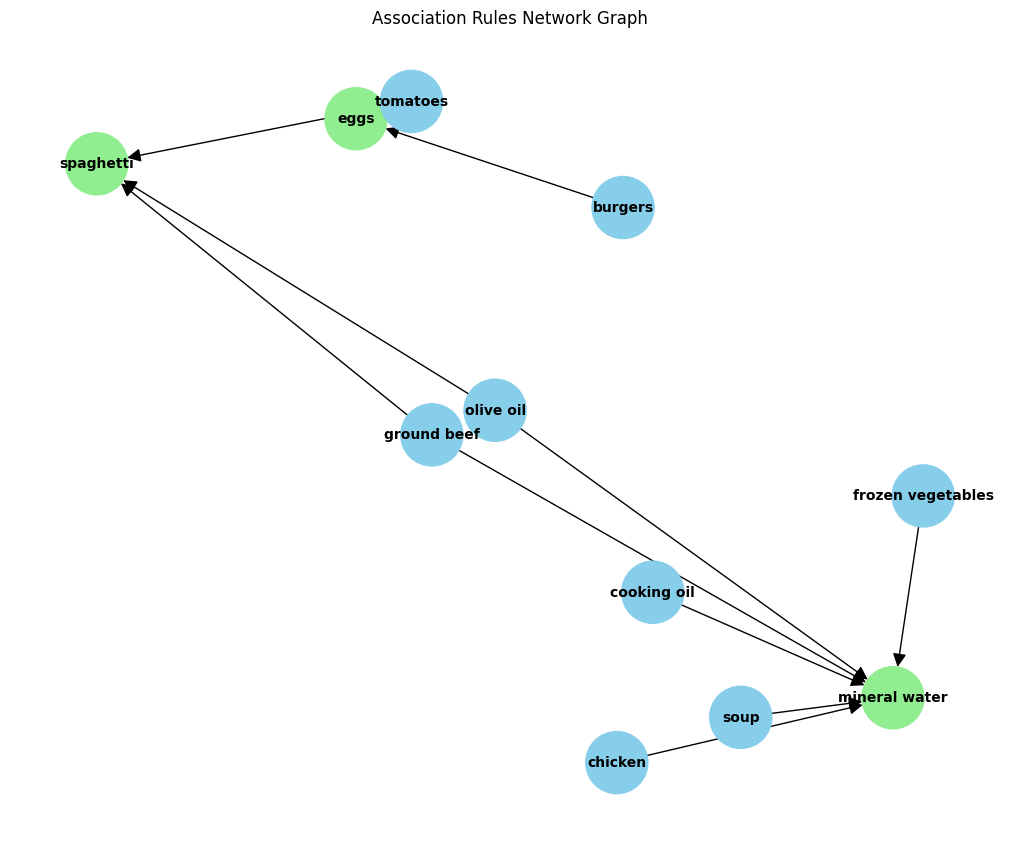

In [39]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges for each rule
for _, row in top_rules.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    G.add_node(antecedent, color='skyblue')
    G.add_node(consequent, color='lightgreen')
    G.add_edge(antecedent, consequent, weight=row['lift'])

# Set node colors
colors = [G.nodes[node]['color'] for node in G.nodes]

# Draw the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=2000, font_size=10, font_weight='bold', arrowsize=20)
plt.title('Association Rules Network Graph')
plt.show()

**Interview Questions:**

# 1. What is Lift in Association Rules?

##  Definition

**Lift** measures the strength of an association rule compared to random chance.

It tells us **how much more likely** two items are bought together **than if they were independent**.

---

##  Formula

Lift = (Confidence of the Rule) / (Expected Confidence if Independent)

or

Lift = P(A and B) / (P(A) * P(B))

Where:
- **P(A and B):** Probability that both A and B are purchased together (support).
- **P(A):** Probability of purchasing A.
- **P(B):** Probability of purchasing B.

---

## 🔑 Why is Lift Important?

| **Lift Value** | **Meaning**                                                                 |
|----------------|-----------------------------------------------------------------------------|
| Lift > 1       | A and B occur **more often together** than by chance (positive correlation). |
| Lift = 1       | A and B are **independent** (no association).                                |
| Lift < 1       | A and B occur **less often together** than by chance (negative correlation). |

---

## ✔️ Example:

| Item | Probability |
|-----|-------------|
| Milk (A)   | 0.4 |
| Butter (B) | 0.3 |
| Milk & Butter together | 0.2 |

- Expected Probability if independent: 0.4 × 0.3 = **0.12**
- Actual joint probability: 0.20
- **Lift = 0.20 ÷ 0.12 = 1.67**

➡️ **Interpretation:**  
Milk and butter are bought together **1.67 times more often** than by random chance.

---

## 🎯 Importance of Lift:

- Detects **non-random & meaningful relationships**.
- Higher lift = stronger, **more useful association for marketing & cross-selling**.
- Helps avoid misleading conclusions from rules with just high support/confidence.

---

## ✅ Summary Answer:

Lift shows **how much an item's purchase increases the chance of another item being bought**.  
It helps identify **truly valuable patterns in the data**.


# 2. What is Support and Confidence in Association Rules?

---

## ✅ Support

### ➡️ **Definition:**
Support measures **how frequently an itemset appears in the entire dataset**.

### 🔢 **Formula:**

Support(A → B) = (Number of transactions containing both A and B) / (Total number of transactions)

### ✔️ **Example:**
- Total transactions: 100
- Transactions containing {milk, butter}: 20

Support = 20 ÷ 100 = **0.20** (or 20%)

---

## ✅ Confidence

### ➡️ **Definition:**
Confidence measures **how often the consequent (B) appears in transactions that contain the antecedent (A)**.  
In simple terms, it tells us **how reliable the rule is**.

### 🔢 **Formula:**

Confidence(A → B) = (Number of transactions containing both A and B) / (Number of transactions containing A)

### ✔️ **Example:**
- Transactions containing {milk, butter}: 20
- Transactions containing milk: 40

Confidence = 20 ÷ 40 = **0.50** (or 50%)

➡️ **Interpretation:**  
When customers buy milk, 50% of the time they also buy butter.

---

## 🎯 Summary:

| Metric     | Meaning                                                    | Formula                                              |
|------------|------------------------------------------------------------|-----------------------------------------------------|
| **Support**   | How common the itemset is in the entire dataset.           | Transactions with A and B ÷ Total transactions      |
| **Confidence**| How likely B is purchased when A is purchased.            | Transactions with A and B ÷ Transactions with A     |

---

## ✅ Business Use:
- Use **Support** to filter out rare/unimportant rules.
- Use **Confidence** to select rules that are **reliable** for recommendations.

# ⚠️ Limitations & Challenges of Association Rule Mining

---

## ❌ 1. Large Number of Rules
- Association Rule Mining often generates **a huge number of rules**, many of which are **irrelevant**.
- Filtering meaningful rules becomes difficult without proper thresholds (support, confidence, lift).

---

## ❌ 2. Requires Careful Threshold Selection
- If **support and confidence thresholds are too high**, you may miss important rules.
- If **thresholds are too low**, you'll get too many trivial or uninteresting rules.

---

## ❌ 3. Ignores Temporal/Sequential Information
- It only finds associations, **not the order in which items were purchased**.
- Example: It won’t tell you whether customers buy milk before or after bread.

---

## ❌ 4. May Find Spurious (Coincidental) Relationships
- High support and confidence **don’t always imply meaningful relationships**.
- Some products may have high co-occurrence simply because they are popular, not because they are related.

---

## ❌ 5. High Computational Cost
- For large datasets with many unique items, calculating all possible item combinations is **computationally expensive**.
- Algorithms like Apriori require multiple scans of the dataset.

---

## ❌ 6. No Contextual Understanding
- It doesn’t explain **why** items are associated, only that they frequently occur together.
- Cannot distinguish between causation and correlation.

---

## ✅ Summary Table:

| Challenge                      | Description                                           |
|---------------------------------|-------------------------------------------------------|
| Too Many Rules                  | Overwhelms analysis with lots of trivial patterns    |
| Threshold Sensitivity           | Requires fine-tuning to avoid missing important rules|
| Ignores Time                    | No sequence or order awareness                      |
| Spurious Associations           | May find meaningless but frequent patterns          |
| Computationally Intensive       | Slow on large datasets                              |
| Lacks Business Context          | Doesn't explain why items are bought together       |

---

## 🔍 Recommendation:
Use Association Rules as an **exploratory tool**, but always combine results with:
- Business knowledge
- Domain expertise
- Additional data analysis

# 🙏 Thank You! 😊